In [1]:
%pip install numpy
%pip install matplotlib

     --------------------------------------- 15.8/15.8 MB 59.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 7.7/7.7 MB 22.2 MB/s eta 0:00:00
     ------------------------------------- 188.2/188.2 kB 11.9 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 70.3 MB/s eta 0:00:00
     ---------------------------------------- 56.1/56.1 kB ? eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 53.6 MB/s eta 0:00:00
     -------------------------------------- 103.2/103.2 kB 6.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math
%matplotlib inline

In [4]:
# load the dataset
x_train, y_train = load_data()

In [8]:
# Print out the x_train and y_train dataset variables
print("Type of x_train:",type(x_train))
print("First five elements of x_train are:\n", x_train[:5]) 

print(" ")

print("Type of y_train:", type(y_train))
print("First five elements of y_train are:\n", y_train[:5])

Type of x_train: <class 'numpy.ndarray'>
First five elements of x_train are:
 [6.1101 5.5277 8.5186 7.0032 5.8598]
 
Type of y_train: <class 'numpy.ndarray'>
First five elements of y_train are:
 [17.592   9.1302 13.662  11.854   6.8233]


x_train is a numpy array that is 1 dimensional and consists of decimal points greater that 0
- Each decimal times 10,000 is the population of a given city
- For example, 2.2101 represents a city population of 21,101

y_train is also a numpy array that is 1 dimmmensional and consists of decimal points but some are negative and others are positive.

- These represent a restraunts average monthly profits in a given city in units of 10,000 dollars
- For example, -2.5805 represents -$25,805 dollars in average monthly loss for that particular restraunt

In [14]:
# Now we want to print the shape of our training data to see how many training examples we have
# we can do this using the numpy shape function

print("Shape of x_train: ", x_train.shape)
print("Shape of y_train: ", y_train.shape)


# Our training data should always have the same number of x examples as it does y.
# If this is not the case then there may be something wrong with the dataset.
if len(x_train) == len(y_train):
    print("Number of training examples: ", len(x_train))
else:
    print("Inconsistent number of training examples of x_train and y_train")

Shape of x_train:  (97,)
Shape of y_train:  (97,)
Number of training examples:  97


We can see that our x and y data sets are both 1D numpy arrays with a length of 97. The length is our number of training examples.

It can be very useful to graphically display our data so we can visualize it. This example only has 2 inputs, an x and a y value which lends itself very well to a typical scatter plot. We can use matplotlib to make a scatter plot of our data.

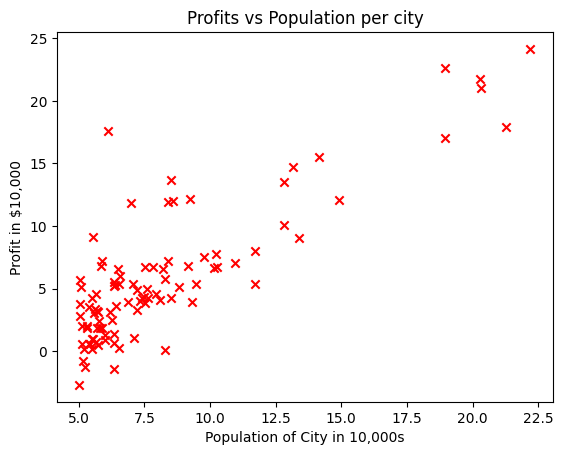

In [17]:
# Create a scatter plot based on the data in x_train and y_train
plt.scatter(x_train, y_train, marker='x', c='r')

# We can give it a title to make it more clear what relationship we are showing
plt.title("Profits vs Population per city")

# Set the y-axis label
plt.ylabel('Profit in $10,000')
# Set the x-axis label
plt.xlabel('Population of City in 10,000s')

# Show the scatter plot
plt.show()

Now that we can visualize our data, it should be easier to understand our goal which is to create a line that best fits this data. Once we have found the line that fits, we can apply it to new data to make predictions. For example, we can give it a new city's population and get a prediction for what the monthly profits in that city will be.

Remember that a linear regression can be represented with the following function:

$$f_{w,b}(x) = wx + b$$

and our goal is to find an optimal set of values for the parameters w and b to best fit our data.

We determine that one set of parameters for w and b are better than another set based on the results of what we call the cost function.

The cost function also takes the parameters w and b and returns a value based on them.

The values that best fit our data will be the ones that produce the minimum value of the cost function.

To find the values of w and b that find the smallest value of the cost function, we utilize the gradient descent algorithm.

With each step in the gradient descent algorithm, the values of w and b get closer to the values that produce the smallest value of the cost function.



Next we need to implement the cost function. The cost function we are using is called the mean squared error function. The function is defined by the following formula for f(w,b):

$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$ 

The inner part of this formula has 2 parts, the first part is:
$$f_{w,b}(x^{(i)})$$

which is actually just the result of our model for a given value of x from our data set. In other words, it is the value our model predicted for some value of x. 

As a reminder, our model uses the function f(w,b) which is defined by this formula:

$$
f_{wb}(x^{(i)}) =  wx^{(i)} + b 
$$

The second part of the function is just

$$y^{(i)}$$

which is the actual expected value for some value of x.

Inside the parentheses, we are subtracting our predicted value from our expected output to determine how far off our prediction was. We are then squaring that resulting difference.

We square the difference for 3 reasons:
- Squaring ensures our error value is positive
- It penalizes larger errors more than smaller errors
- To ensure smooth differentiability for the gradient decent algorithm

We then need to sum all of the values we get from those functions for all training examples.

m represents the number of training examples of our data and we start our index for i at 0. Since we are using zero based indexing we will go from 0 to (m - 1).

Once we have our sum, we can divide it by 2m to get our cost.

In [28]:
def compute_cost(x, y, w, b):
    
    # num of training examples, assuming x and y have same length
    m = x.shape[0]
    
    # The final cost value
    total_cost = 0

    # This represents the local sum from the mean squared error function in our formula 
    cost_sum = 0
    for i in range(m):
        prediction = w * x[i] + b
        cost_sum += (prediction - y[i])**2
    
    # This represents the final division we do after we have summed all the values
    total_cost = cost_sum / (2 * m)

    return total_cost




Now that we have implemented our cost function, we can run it against some test cases using the code below.

In [29]:
# Compute cost with some initial values for paramaters w, b
initial_w = 2
initial_b = 1

cost = compute_cost(x_train, y_train, initial_w, initial_b)
print(type(cost))
print(f'Cost at initial w: {cost:.3f}')

# Public tests
from public_tests import *
compute_cost_test(compute_cost)

<class 'numpy.float64'>
Cost at initial w: 75.203
All tests passed!


### Gradient Decent

Now that we have our cost function in place, we need to implement the gradient descent algorithm that will optimize our parameters for w and b to minimize the cost function.

The formula for the gradient descent algorithm looks like this:

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & \phantom {0000} b := b -  \alpha \frac{\partial J(w,b)}{\partial b} \newline       \; & \phantom {0000} w := w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{1}  \; & 
\newline & \rbrace\end{align*}$$


This looks a bit scary so lets break it down a little. As stated, the algorithm is repeatedly updating the values of b and w until we reach convergence. We determine that we have hit convergence when the value of the cost function hits its minimum point or to put it simply, the value stops decreasing.

Each update step involves a couple of different components. In the update step for b we take

$$
b -  \alpha \frac{\partial J(w,b)}{\partial b}
$$

where alpha is the learning rate for the algorithm. Alpha controls how 'big of a step' we take with the gradient decent, too large of an alpha value may mean we skip over a minimum while to small may mean the algorithm is very slow.

The derivative portion of the update step for b is known as the gradient. This is a partial derivative of the cost function with respect to the value b. This tells us how the cost function changes as b changes while w remains constant.

The update steps for w are very similar but we instead are using the partial derivative of the cost function with respect to w instead of with respect to b. This tells us how the cost function changes as w changes while b remains constant. We subtract this from the value of w just like we did with b in the other update step.

These steps are repeated until the output of the cost function stops decreasing, again we refer to this as convergance.

The partial derivatives can be expressed more simply as:

where, parameters $w, b$ are both updated simultaniously and where  
$$
\frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{2}
$$
$$
\frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)} \tag{3}
$$
* m is the number of training examples in the dataset

    
*  $f_{w,b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$, is the target value

Notice that the partial derivative with respect to w is very similar to the partial derivative with respect to b. The only difference is that with respect to w, we are multiplying the partial derivative with respect to b by x at it.

Let's try and implement a function called compute_gradient that calculates the partial derivatives aka the gradients with respect to w and with respect to b.

In [30]:
def compute_gradient(x, y, w, b):

    # Number of training examples
    m = x.shape[0]

    dj_dw = 0
    dj_db = 0

    for i in range(m):
        prediction = w * x[i] + b
        error = prediction - y[i]
        dj_db += error
        dj_dw += error * x[i]

    dj_db = dj_db / m
    dj_dw = dj_dw / m

    return dj_dw, dj_db

Now that we have compute_gradient implemented, lets run it against some test cases.

In [31]:
# Compute and display gradient with w initialized to zeroes
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)

compute_gradient_test(compute_gradient)

Gradient at initial w, b (zeros): -65.32884974555672 -5.83913505154639
Using X with shape (4, 1)
All tests passed!


Now that we know our implementation of compute_gradient works, lets use it on our dataset.

In [32]:
# Compute and display cost and gradient with non-zero w
test_w = 0.2
test_b = 0.2
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, test_w, test_b)

print('Gradient at test w, b:', tmp_dj_dw, tmp_dj_db)

Gradient at test w, b: -47.41610118114435 -4.007175051546391


**Expected Output**:
<table>
  <tr>
    <td> <b>Gradient at test w<b></td>
    <td> -47.41610118 -4.007175051546391</td> 
  </tr>
</table>

Now lets run batch gradient descent

In [48]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    """
    Implement batch gradient descent to optimize model parameters.
    
    Args:
      x :    (ndarray): Shape (m,) - Input feature array.
      y :    (ndarray): Shape (m,) - Target values array.
      w_in, b_in : (scalar) - Initial guesses for the model's parameters.
      cost_function: Function to compute the cost of a given set of parameters.
      gradient_function: Function to compute the gradients of the cost with respect to the parameters.
      alpha : (float) - Learning rate, controls the step size in parameter space.
      num_iters : (int) - Number of iterations to run the gradient descent.
      
    Returns:
      w : (ndarray): Shape (1,) - Optimized value of the weight parameter after gradient descent.
      b : (scalar) - Optimized value of the bias parameter after gradient descent.
      J_history : (list) - Cost history over iterations, useful for debugging/visualization.
      w_history : (list) - Weight history over iterations, useful for debugging/visualization.
    """
    
    # Initialize the number of training examples
    m = len(x)
    
    # Initialize histories for storing cost J and parameter w during iterations
    J_history = []
    w_history = []

    # Initialize local w with a deep copy to avoid modifying the global variable
    w = copy.deepcopy(w_in)
    b = b_in

    # Initialize w and b with the input parameters. Use copy for w to avoid changing it outside the function

    for i in range(num_iters):
        # Step 1: Compute the gradients of the cost function with respect to w and b.
        # Hint: Use the gradient_function(x, y, w, b) provided.
        dj_dw, dj_db = gradient_function(x, y, w, b)

        # Step 2: Update the parameters w and b using the gradients and the learning rate alpha.
        # Recall the update rule: new_param = old_param - alpha * gradient
        w = w - (alpha * dj_dw)
        b = b - (alpha * dj_db)

        # Step 3: Optionally compute the cost every iteration and append it to J_history.
        # This is useful to check if the cost is decreasing.
        if i < 100000:  
          cost = cost_function(x, y, w, b)
          J_history.append(cost)

        # Step 4: Print the cost every 10% of the total iterations to monitor progress.
        # Adjust the frequency as needed based on num_iters.
        if i% math.ceil(num_iters / 10) == 0:
           w_history.append(w)
           print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")

    # Return the optimized parameters and the cost history.
    return w, b, J_history, w_history


In [49]:
# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 1500
alpha = 0.01

w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost     6.74   
Iteration  150: Cost     5.31   
Iteration  300: Cost     4.96   
Iteration  450: Cost     4.76   
Iteration  600: Cost     4.64   
Iteration  750: Cost     4.57   
Iteration  900: Cost     4.53   
Iteration 1050: Cost     4.51   
Iteration 1200: Cost     4.50   
Iteration 1350: Cost     4.49   
w,b found by gradient descent: 1.166362350335582 -3.63029143940436


Now that we have found our values for w and b, we can use them to make predictions for the entire data set. The following code explains how this is done.

In [53]:
# Number of training examples m
m = x_train.shape[0]

# Create a numpy array to store our predictions for every training example
predicted = np.zeros(m)

# Iterate over our training examples and assign each prediction made by our model
# to the "predicted" array. 
for i in range(m):
    predicted[i] = w * x_train[i] + b

Next we can plot our scatter plot and the line of our regression to visually see how it fits.

Text(0.5, 0, 'Population of City in 10,000s')

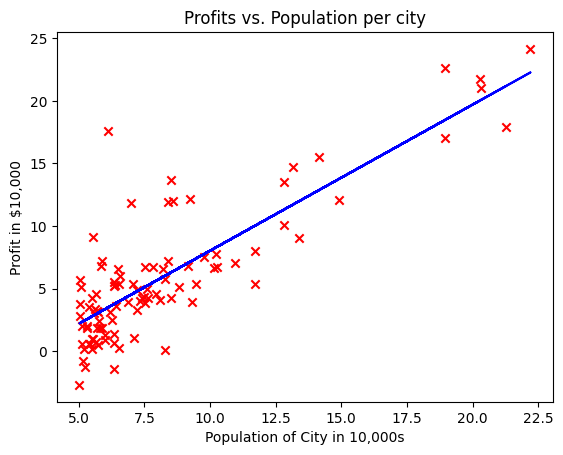

In [51]:
# Plot the linear fit
plt.plot(x_train, predicted, c = "b")

# Create a scatter plot of the data. 
plt.scatter(x_train, y_train, marker='x', c='r') 

# Set the title
plt.title("Profits vs. Population per city")
# Set the y-axis label
plt.ylabel('Profit in $10,000')
# Set the x-axis label
plt.xlabel('Population of City in 10,000s')

Now that we have found our optimal values of w and b for the model, we can also utilize them to make predictions on data that isn't in our data set. We just need to pass in our own values for x. Remember that the data in x_train are floating points that represent a city population in 10,000 increments.

Let's try a population of 35,000 and another at 70,000.

Again, since population is in units of 10,000, we will use 3.5 for 35,000 and 7.0 for 70,000.

In [52]:
predict1 = 3.5 * w + b
print('For population = 35,000, we predict a profit of $%.2f' % (predict1*10000))

predict2 = 7.0 * w + b
print('For population = 70,000, we predict a profit of $%.2f' % (predict2*10000))

For population = 35,000, we predict a profit of $4519.77
For population = 70,000, we predict a profit of $45342.45
